In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV

In [5]:
df=pd.read_csv(r"F:\Data Science\Assignments\15. Random Forest/Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
df.shape

(400, 11)

In [8]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
df[df.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [10]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


## EDA

<AxesSubplot:>

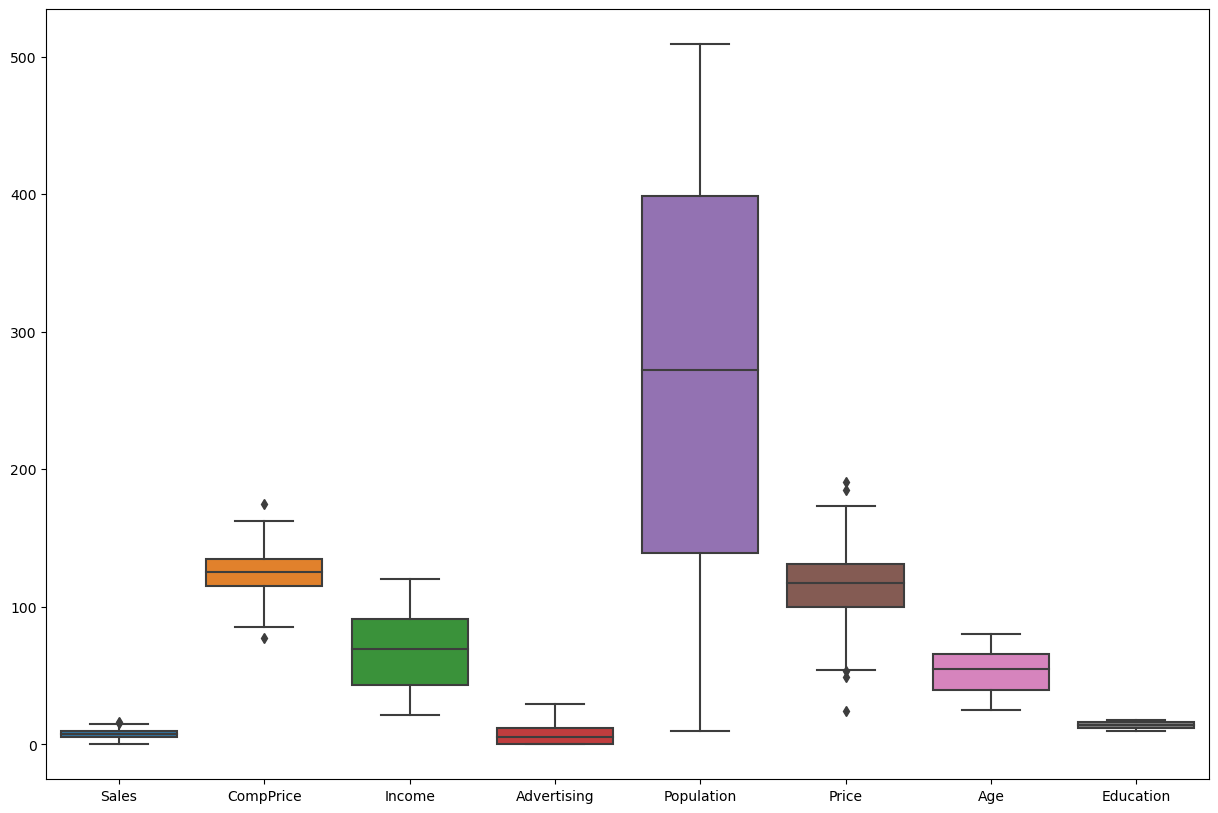

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

In [12]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

### Outlier Detection

In [13]:
def outlier(df):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier(df[numerical_features])))) 

The dataset contains 0 observations with more than 2 outliers


In [14]:
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


In [15]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0


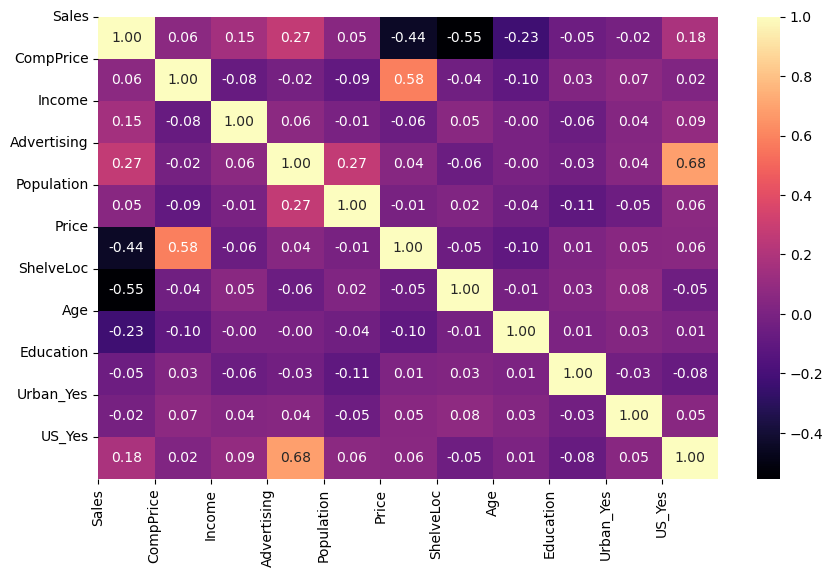

In [16]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

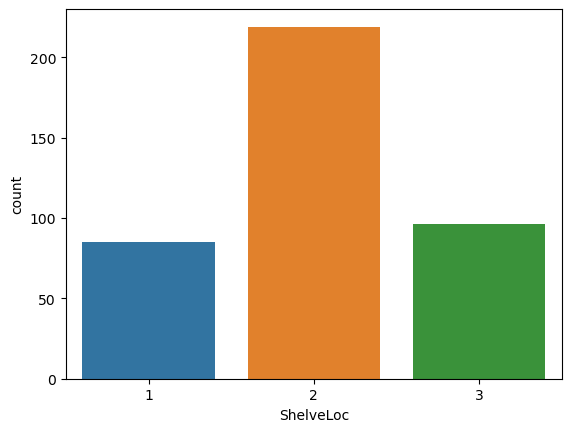

In [17]:
sns.countplot(df['ShelveLoc'])
plt.show()

### Converting Target variable into categorical

In [18]:
df['Sales'].mean()

7.496325

<AxesSubplot:xlabel='Sales', ylabel='count'>

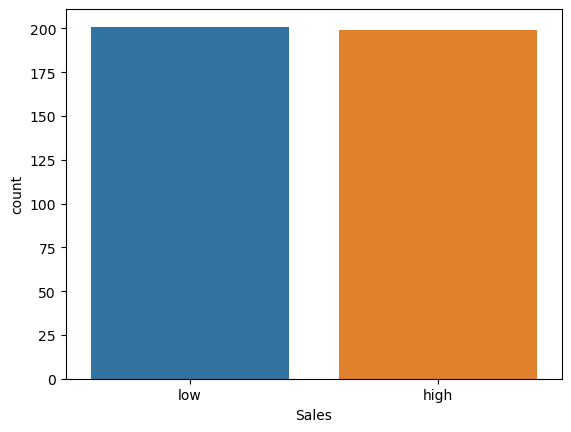

In [19]:
df['Sales']=pd.cut(df['Sales'],bins=(0,7.50,17),labels=['low','high'], right = False)
sns.countplot(df['Sales'])

In [20]:
df['Sales'].value_counts()

low     201
high    199
Name: Sales, dtype: int64

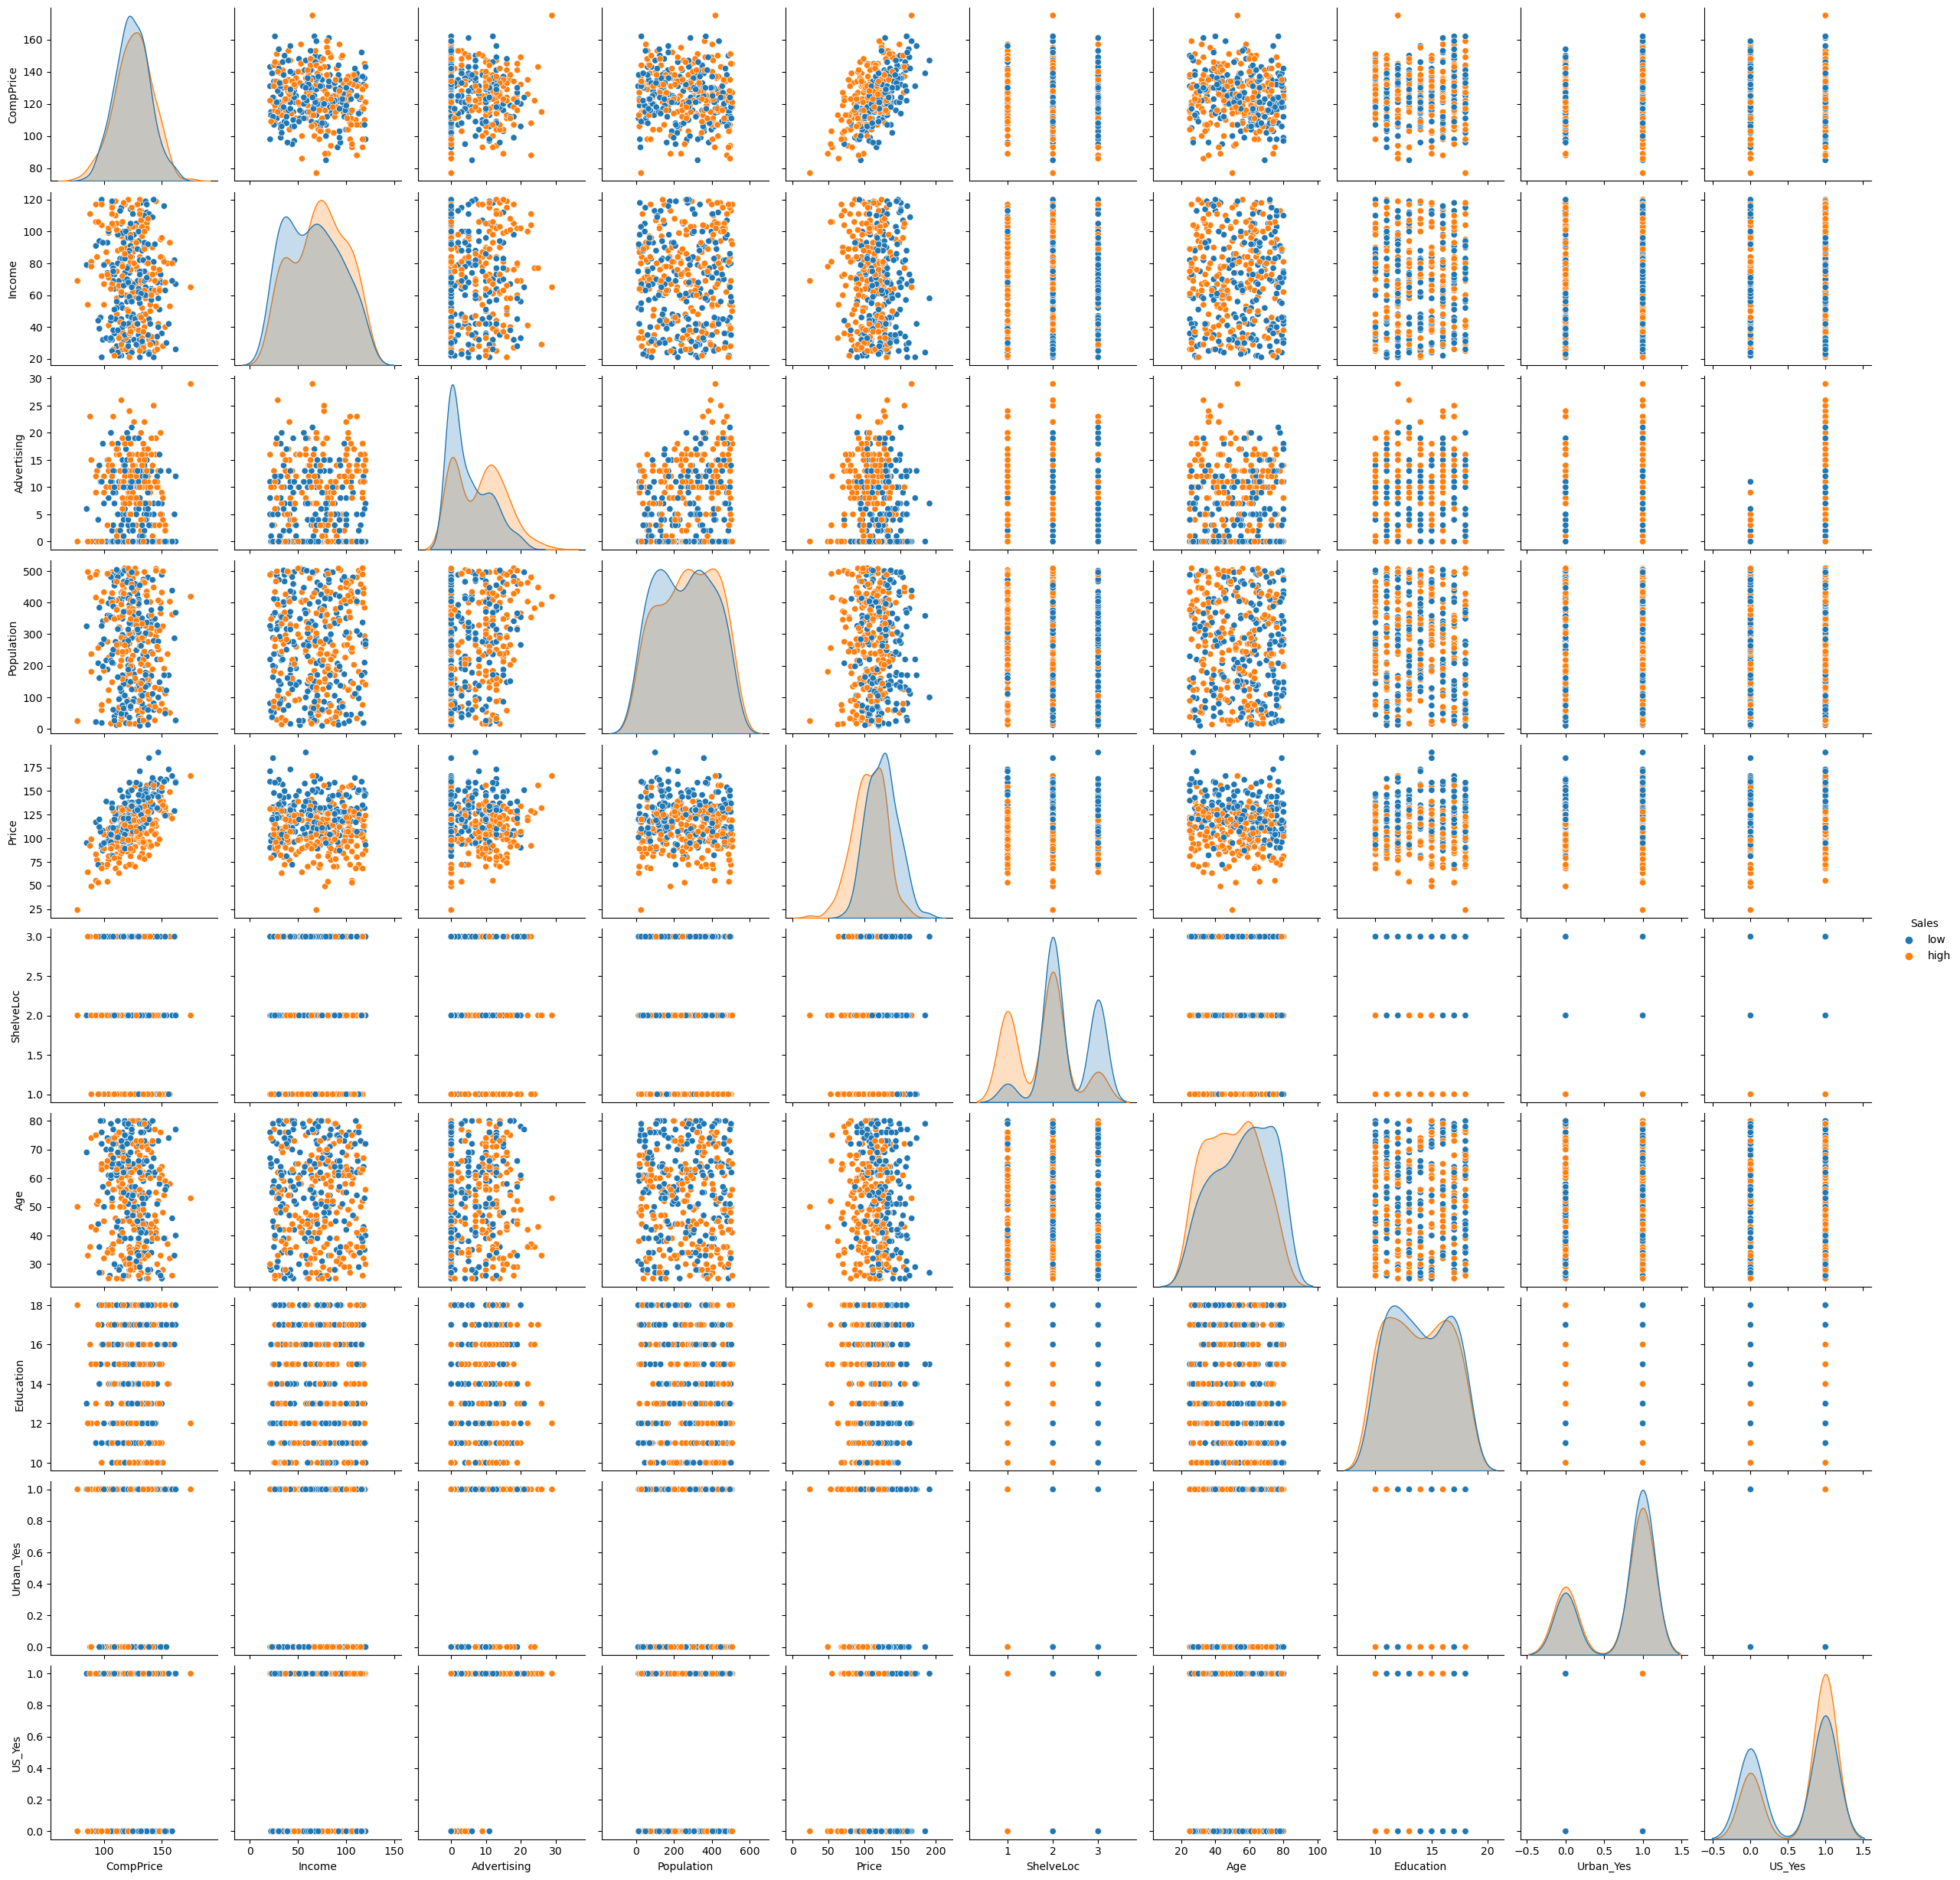

In [21]:
sns.pairplot(data=df, hue = 'Sales')

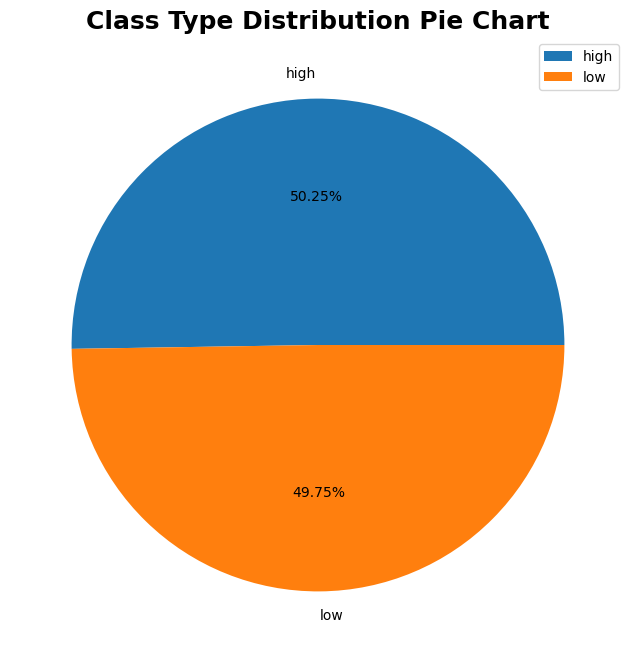

In [22]:
#Checking for Imbalanced or balanced dataset with regards to the Target

plt.figure(figsize = (12,8))
plt.pie(df['Sales'].value_counts(),
       labels=df.Sales.unique(),
       autopct= '%.2f%%')
plt.legend(loc= 'upper right')      
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

### Label encoder for target variable

In [23]:
label_encoder = preprocessing.LabelEncoder()

df['Sales'] = label_encoder.fit_transform(df['Sales'])

In [24]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,0,138,73,11,276,120,3,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,3,38,13,1,0


In [25]:
# Dividing data into independent variables and dependent variable
X = df.drop('Sales', axis = 1)
Y = df['Sales']

In [26]:
print(X)
print(Y)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          3   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          3   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          3   50   
399        134      37            0          27    120          1   49   

     Education  Urban_Yes  US_Yes  
0           17          1       1  
1           10          1       1  
2  

In [27]:
# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.25, random_state= 40,stratify=Y)

In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((300, 10), (100, 10), (300,), (100,))

### Model Building

In [29]:
model=RandomForestClassifier(n_estimators=100,max_features=3)

In [30]:
kfold=KFold(n_splits=5,random_state=10,shuffle=True)

In [31]:
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [32]:
preds=model.predict(x_test)
print(preds)
print(pd.Series(preds).value_counts())

[0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1]
1    54
0    46
dtype: int64


In [33]:
model.score(x_test, y_test)

0.76

In [34]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        50
           1       0.74      0.80      0.77        50

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.76      0.76      0.76       100



In [35]:
preds_train=model.predict(x_train)
print(preds_train)
print(pd.Series(preds_train).value_counts())

[0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1
 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1
 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0
 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1
 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1
 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0
 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0
 1 0 1 0]
1    151
0    149
dtype: int64


In [36]:
print(classification_report(y_train,preds_train))
print(model.score(x_train, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       149
           1       1.00      1.00      1.00       151

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

1.0


### HyperParameter Tuning

In [37]:
model_new = RandomForestClassifier(random_state=40)
params_grid={"n_estimators":[200,250,400,450,500,800,1000], 
             "max_depth":[5,7,9,10,12,14],
             "min_samples_leaf":range(2,10),
             "min_samples_split":[4,8,10,12,15,18,20],
             "max_leaf_nodes":range(4,21),
             "max_features":[2,3,4,5,6,7,8,9,10],
             "criterion":['gini','entropy']}
model_cv = RandomizedSearchCV(model_new, param_distributions=params_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=kfold)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
                   estimator=RandomForestClassifier(random_state=40), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 7, 9, 10, 12, 14],
                                        'max_features': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10],
                                        'max_leaf_nodes': range(4, 21),
                                        'min_samples_leaf': range(2, 10),
                                        'min_samples_split': [4, 8, 10, 12, 15,
                                                              18, 20],
                                        'n_estimators': [200, 250, 400, 450,
                                                         500, 800, 1000]},
                   scoring='accuracy', verbose=1)

In [38]:
best_params = model_cv.best_params_
print(f"Best paramters: {best_params}")

Best paramters: {'n_estimators': 250, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_leaf_nodes': 18, 'max_features': 10, 'max_depth': 7, 'criterion': 'entropy'}


In [40]:
y_pred_t=model_cv.predict(x_train)
print('dt_Train_R2:',classification_report(y_train,y_pred_t))

dt_Train_R2:               precision    recall  f1-score   support

           0       0.94      0.91      0.93       149
           1       0.92      0.94      0.93       151

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [41]:
y_pred_test=model_cv.predict(x_test)
print('dt_Train_R2:',classification_report(y_test,y_pred_test))
print('Accuracy Score:',accuracy_score(y_test,y_pred_test))

dt_Train_R2:               precision    recall  f1-score   support

           0       0.85      0.68      0.76        50
           1       0.73      0.88      0.80        50

    accuracy                           0.78       100
   macro avg       0.79      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100

Accuracy Score: 0.78


### After Hyperparameter score is not imporoving, hence applying imbalance technique

In [42]:
from imblearn.combine import SMOTEENN

In [43]:
sm=SMOTEENN(random_state=201)
x_resampled,y_resampled=sm.fit_resample(X,Y)

In [44]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x_resampled,y_resampled,test_size=0.25,random_state=40)

In [45]:
model_new=RandomForestClassifier(random_state=201)
params_grid={"n_estimators":[200,250,400,450,500,800,1000], 
             "max_depth":[5,7,9,10,12,14],
             "min_samples_leaf":range(2,10),
             "min_samples_split":[4,8,10,12,15,18,20],
             "max_leaf_nodes":range(4,21),
             "max_features":[2,3,4,5,6,7,8,9,10]}

model_cv_new = RandomizedSearchCV(model_new, param_distributions=params_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=kfold)
model_cv_new.fit(xr_train,yr_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
                   estimator=RandomForestClassifier(random_state=201),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 9, 10, 12, 14],
                                        'max_features': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10],
                                        'max_leaf_nodes': range(4, 21),
                                        'min_samples_leaf': range(2, 10),
                                        'min_samples_split': [4, 8, 10, 12, 15,
                                                              18, 20],
                                        'n_estimators': [200, 250, 400, 450,
                                                         500, 800, 1000]},
                   scoring='accuracy', verbose=1)

In [46]:
best_params = model_cv_new.best_params_
print(f"Best paramters: {best_params}")

Best paramters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_leaf_nodes': 14, 'max_features': 3, 'max_depth': 9}


In [47]:
y_pred1=model_cv_new.predict(xr_test)
y_pred1

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1])

In [48]:
print(classification_report(yr_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.88      1.00      0.93        14

    accuracy                           0.92        24
   macro avg       0.94      0.90      0.91        24
weighted avg       0.93      0.92      0.91        24



In [49]:
print('Accuracy Score:',accuracy_score(yr_test,y_pred1))

Accuracy Score: 0.9166666666666666


In [50]:
y_pred_t=model_cv_new.predict(xr_train)
print('dt_Train_R2:',classification_report(yr_train,y_pred_t))
print('Accuracy Score:',accuracy_score(yr_train,y_pred_t))

dt_Train_R2:               precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.97      0.97      0.97        38

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70

Accuracy Score: 0.9714285714285714


In [51]:
y_pred_df=pd.DataFrame({'actual':yr_test,'Prediction':y_pred1})
y_pred_df

,actual,Prediction
36,0,0
57,1,1
11,0,0
89,1,1
27,0,0
33,0,0
17,0,0
40,0,1
4,0,0
26,0,0


In [52]:
y_pred_df['Correct']=y_pred_df['actual']==y_pred_df['Prediction']
display(y_pred_df)

,actual,Prediction,Correct
36,0,0,True
57,1,1,True
11,0,0,True
89,1,1,True
27,0,0,True
33,0,0,True
17,0,0,True
40,0,1,False
4,0,0,True
26,0,0,True


In [53]:
y_pred_df['Correct'].value_counts()

True     22
False     2
Name: Correct, dtype: int64